#### Teoría de Circuitos II
<img src="./logo_UTN.svg" align="right" width="150" /> 

# Filtros de crossover de Bessel-Thompson
#### Dr. Ing. Mariano Llamedo Soria
Grupo de Investigación en Bioingeniería (GIBIO)


En el siguiente documento se presenta un ejemplo de aplicación de la aproximación de Bessel-Thompson para el diseño de un esquema de crossover.

Basado en la nota técnica disponible [online](https://www.ranecommercial.com/legacy/note147.html).

#### Concepto de demora

bla


#### Inicialización

bla

In [1]:
import numpy as np
import sympy as sp
from IPython.display import display
from pytc2.general import print_subtitle, print_latex, a_equal_b_latex_s
from pytc2.sistemas_lineales import pretty_print_bicuad_omegayq, s, tf2sos_analog, pretty_print_SOS, analyze_sys, tfadd

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)
# gráficos interactivos en jupyter

# %matplotlib ipympl
%matplotlib inline


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 12
fig_sz_y = 10
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})



#### Demora para un sistema de primer orden

bla

In [2]:
w0z, w0p, sigz, sigp, Qz, Qp, w = sp.symbols('\omega_{0z},\omega_{0p}, \sigma_z, \sigma_p, Q_z, Q_p, \omega', real = True)
j = sp.I


# T1s =  sigp/(s + sigp )
T1s = (s + sigz )/(s + sigp )

print_latex(a_equal_b_latex_s('T_1(s)', T1s  ))

T1jw = T1s.subs( {s:j*w} )
# T1jw = sigp/(j*w + sigp )
# T1jw = (j*w + sigz )/(j*w + sigp )

print_latex(a_equal_b_latex_s('T_1(j\omega)', T1jw  ))

phaT1jw = sp.atan( sp.simplify(sp.expand(sp.im(T1jw))) / sp.simplify(sp.expand(sp.re(T1jw))) )

DT1 = sp.simplify(sp.expand(-sp.diff(phaT1jw, w))) 

print_latex(a_equal_b_latex_s('\phi_{T1}(\omega)', phaT1jw ))

print_latex(a_equal_b_latex_s('D_{T1}(\omega)', DT1 ))

# print_subtitle('Demora para un pasabajo de primer orden')
print_subtitle('Demora para un pasabajo de primer orden')

print_latex(a_equal_b_latex_s('D_{T1}(\omega=0)', sp.simplify(sp.expand(DT1.subs( {w:0} ))) ))

# print_latex(a_equal_b_latex_s('D_{T1}(\omega=1)', sp.simplify(sp.expand(DT1.subs( {w:sigp} ))) ))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Demora para un pasabajo de primer orden

<IPython.core.display.Math object>

#### Demora para un sistema de segundo orden (SOS)

bla


In [3]:
#print_subtitle('SOS pasabajo')
#T2s = w0p**2/(s**2+ s*w0p/Qp + w0p**2)

print_subtitle('SOS bicuadrático')
T2s = (s**2+ s*w0z/Qz + w0z**2)/(s**2+ s*w0p/Qp + w0p**2)

print_latex(a_equal_b_latex_s('T_2(s)', T2s  ))

T2jw = T2s.subs( {s:j*w} )

print_latex(a_equal_b_latex_s('T_2(j\omega)', T2jw  ))

# factorizando polinomios no funcionó
num_roots = sp.roots( (s**2+ s*w0z/Qz + w0z**2).as_poly(s) )
den_roots = sp.roots( (s**2+ s*w0p/Qp + w0p**2).as_poly(s) )

T2sz = sp.Rational(1.)
for root, multiplicity in num_roots.items():
    for ii in range(multiplicity):
        T2sz = T2sz * (s - root)

T2sp = sp.Rational(1.)    
for root, multiplicity in den_roots.items():
    for ii in range(multiplicity):
        T2sp = T2sp / (s - root)
        
# Analizo la demora del num y den por separado, ya que num resta demora y den suma
T2s = T2sz/T2sp 

print_subtitle('Factorizado en raíces')

print_latex(a_equal_b_latex_s('T_2(s)', T2s  ))

T2jw = T2s.subs( {s:j*w} )
# T2jw = w0p**2/(-w**2+ j*w*w0p/Qp + w0p**2)
# T2jw = (-w**2+ j*w*w0z/Qz + w0z**2)/(-w**2+ j*w*w0p/Qp + w0p**2)

T2zjw = T2sz.subs( {s:j*w} )
T2pjw = T2sp.subs( {s:j*w} )

print_latex(a_equal_b_latex_s('T_2(j\omega)', T2jw  ))

# phaT2jw = sp.atan( sp.simplify(sp.expand(sp.im(T2jw))) / sp.simplify(sp.expand(sp.re(T2jw))) )
phaT2zjw = sp.atan( sp.simplify(sp.expand(  sp.simplify(sp.expand(sp.im(T2zjw))) / sp.simplify(sp.expand(sp.re(T2zjw))) )) )
phaT2pjw = sp.atan( sp.simplify(sp.expand( sp.simplify(sp.expand(sp.im(T2pjw))) / sp.simplify(sp.expand(sp.re(T2pjw))) )) )
phaT2jw = phaT2zjw + phaT2pjw 

# DT2 = sp.simplify(sp.expand(-sp.diff(phaT2jw, w)))
DT2z = sp.simplify(sp.expand(-sp.diff(phaT2zjw, w)))
DT2p = sp.simplify(sp.expand(-sp.diff(phaT2pjw, w)))

DT2 = DT2z + DT2p

print_subtitle('Fase')

print_latex(a_equal_b_latex_s('\phi_{T2}(\omega)', phaT2jw ))

print_subtitle('Demora')

print_latex(a_equal_b_latex_s('D_{T2}(\omega)', DT2  ))

print_latex(a_equal_b_latex_s('D_{T2}(\omega=0)', sp.simplify(sp.expand(DT2.subs( {w:0} ))) ))

print_latex(a_equal_b_latex_s('D_{T2}(\omega=\omega_{0p})', sp.simplify(sp.expand(DT2.subs( {w:w0p} ))) ))
# print_latex(a_equal_b_latex_s('D_{T2}(\omega=\omega_{0p};\omega_{0p}=1)', sp.simplify(sp.expand(DT2.subs( {w:1, w0p:1} ))) ))


#### SOS bicuadrático

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Factorizado en raíces

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Fase

<IPython.core.display.Math object>

#### Demora

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Casos particulares de SOS: Pasabajos normalizado

bla


In [8]:
print_subtitle('SOS pasabajo normalizado')
T2s = 1/(s**2+ s*1/Qp + 1)

print_latex(a_equal_b_latex_s('T_2(s)', T2s  ))

T2jw = T2s.subs( {s:j*w} )

print_latex(a_equal_b_latex_s('T_2(j\omega)', T2jw  ))

phaT2jw = sp.atan( sp.simplify(sp.expand(sp.im(T2jw))) / sp.simplify(sp.expand(sp.re(T2jw))) )

DT2 = sp.simplify(sp.expand(-sp.diff(phaT2jw, w)))

print_subtitle('Fase')

print_latex(a_equal_b_latex_s('\phi_{T2}(\omega)', phaT2jw ))

print_subtitle('Demora')

print_latex(a_equal_b_latex_s('D_{T2}(\omega)', DT2  ))

print_latex(a_equal_b_latex_s('D_{T2}(\omega=0)', sp.simplify(sp.expand(DT2.subs( {w:0} ))) ))

print_latex(a_equal_b_latex_s('D_{T2}(\omega=\omega_{0p})', sp.simplify(sp.expand(DT2.subs( {w:1} ))) ))


#### SOS pasabajo normalizado

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Fase

<IPython.core.display.Math object>

#### Demora

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Casos particulares de SOS: Pasatodo

bla


In [12]:
print_subtitle('SOS pasatodo normalizado')
T2s = (s**2 - s*w0p/Qp + w0p**2)/(s**2+ s*w0p/Qp + w0p**2)
T2s = T2s.subs( {w0p:1} )

print_latex(a_equal_b_latex_s('T_2(s)', T2s  ))

T2jw = T2s.subs( {s:j*w} )

print_latex(a_equal_b_latex_s('T_2(j\omega)', T2jw  ))

phaT2jw = sp.atan( sp.simplify(sp.expand(sp.im(T2jw))) / sp.simplify(sp.expand(sp.re(T2jw))) )

DT2 = sp.simplify(sp.expand(-sp.diff(phaT2jw, w)))

print_subtitle('Fase')

print_latex(a_equal_b_latex_s('\phi_{T2}(\omega)', phaT2jw ))

print_subtitle('Demora')

print_latex(a_equal_b_latex_s('D_{T2}(\omega)', DT2  ))

print_latex(a_equal_b_latex_s('D_{T2}(\omega=0)', sp.simplify(sp.expand(DT2.subs( {w:0} ))) ))

print_latex(a_equal_b_latex_s('D_{T2}(\omega=\omega_{0p})', sp.simplify(sp.expand(DT2.subs( {w:1} ))) ))


#### SOS pasatodo normalizado

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Fase

<IPython.core.display.Math object>

#### Demora

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Simulación numérica de respuestas Bessel-Thompson

bla


#### Bessel pasabajo de orden 2

#### Normalización por mag

<IPython.core.display.Math object>

#### Normalización por phase

<IPython.core.display.Math object>

#### Normalización por delay

<IPython.core.display.Math object>

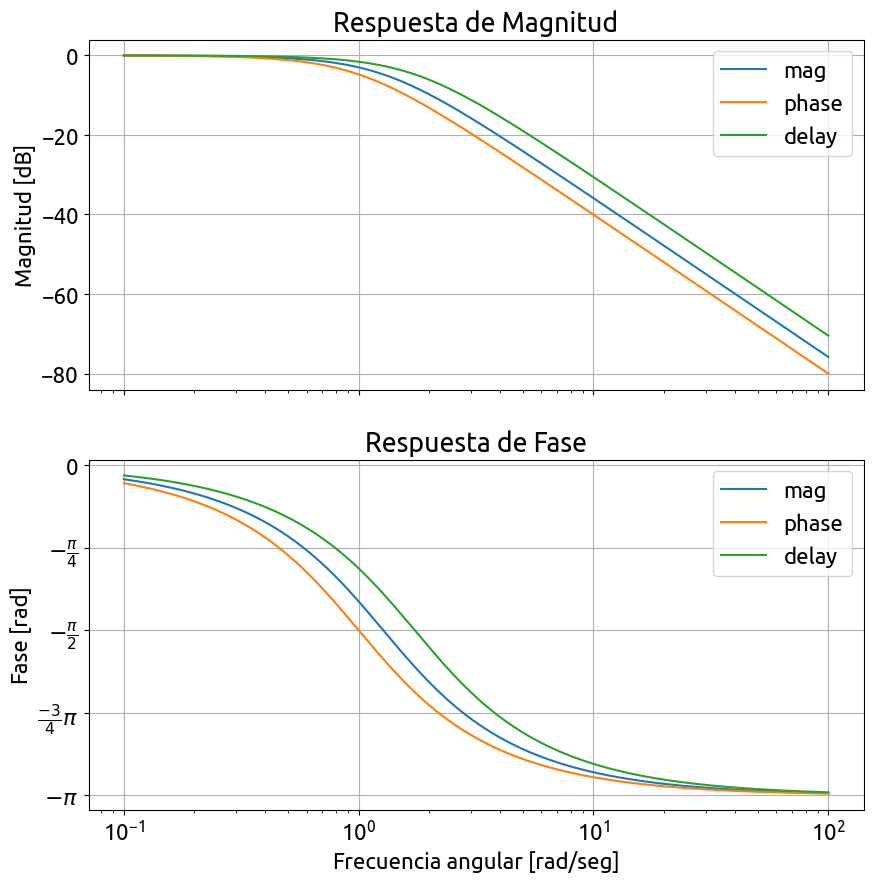

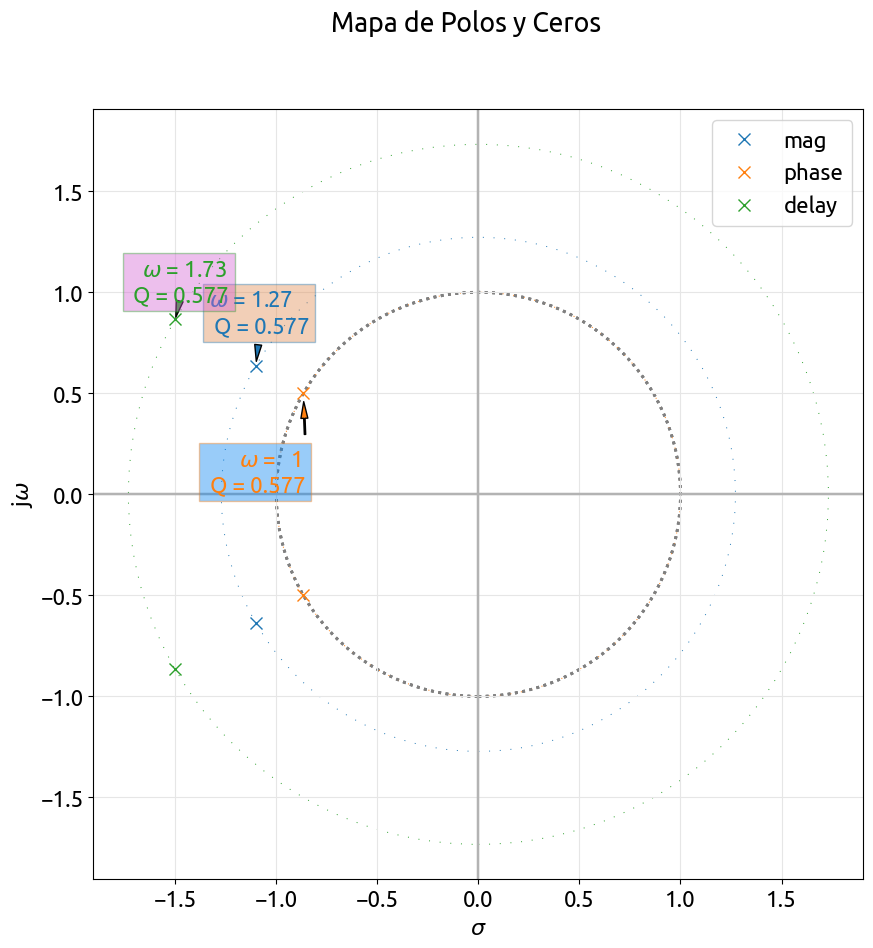

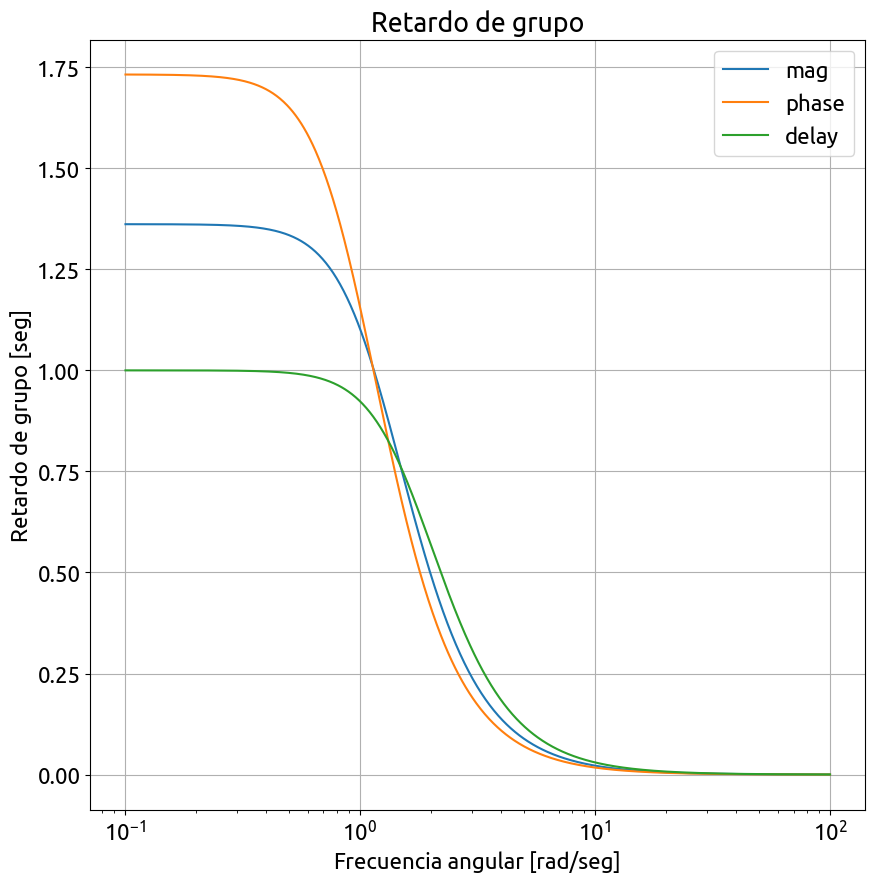

In [14]:
import scipy.signal as sig
import matplotlib.pyplot as plt

nn = 2
print_subtitle('Bessel pasabajo de orden {:d}'.format(nn))

omega_norm = ['mag', 'phase', 'delay']
all_lp = []

for this_norm in omega_norm:
    
    z,p,k = sig.besselap(nn, norm=this_norm)
    
    num_lp, den_lp = sig.zpk2tf( z,p,k)

    tf_lp = sig.TransferFunction(num_lp, den_lp)

    all_lp += [tf_lp]

    print_subtitle('Normalización por {:s}'.format(this_norm))
    
    sos_lp = tf2sos_analog(num_lp, den_lp)
    
    pretty_print_SOS(sos_lp, mode='omegayq')

_,_,_,_, = analyze_sys(all_lp, omega_norm)



#### Bessel pasa-altas de orden 2

<IPython.core.display.Math object>

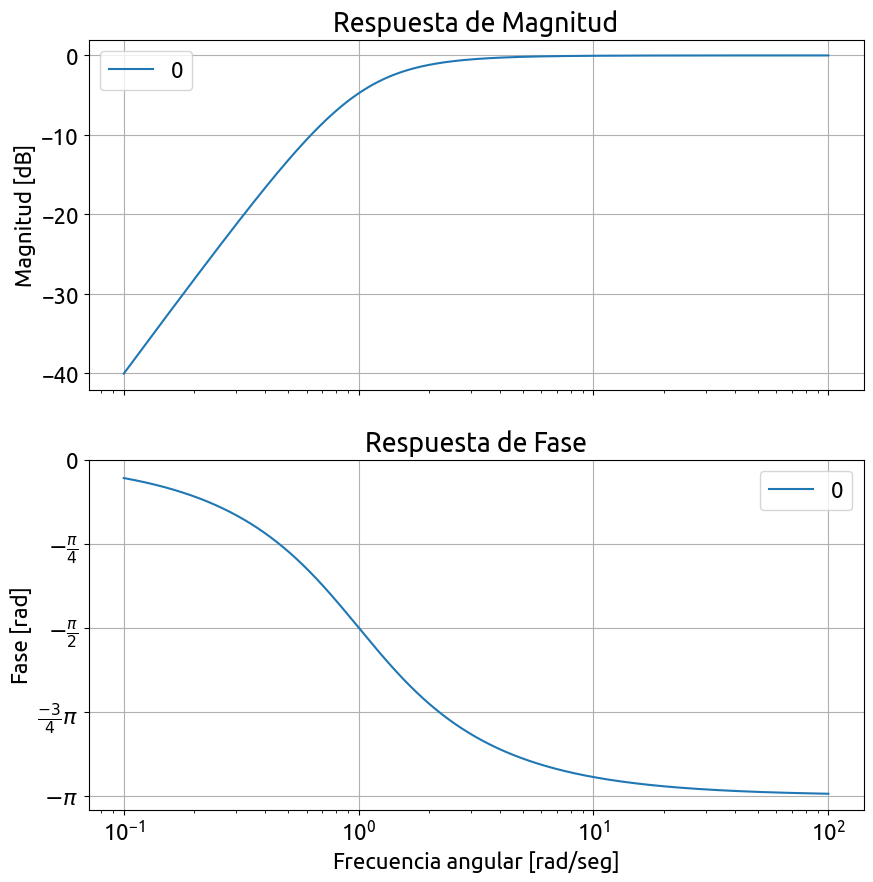

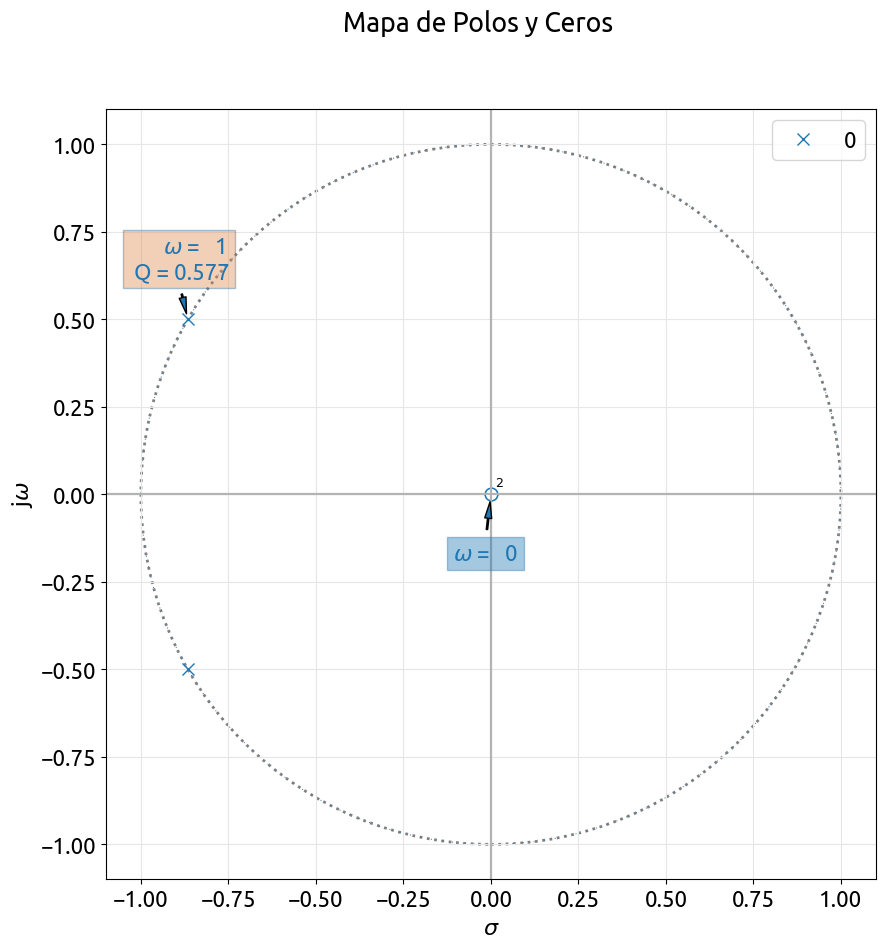

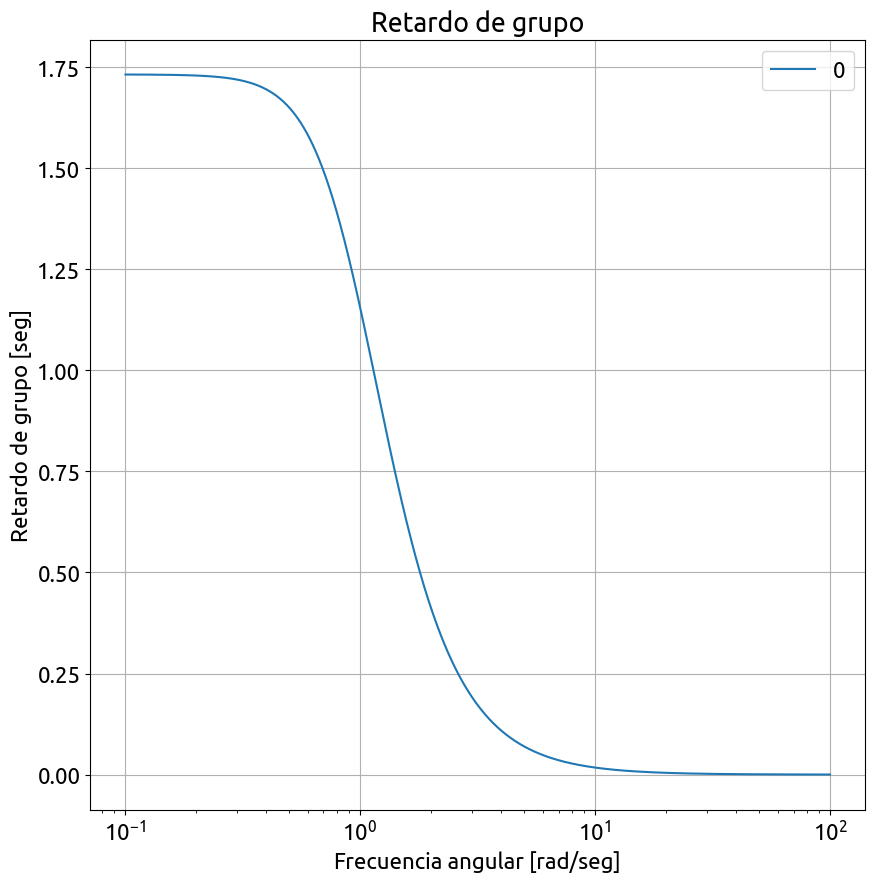

In [5]:
print_subtitle('Bessel pasa-altas de orden {:d}'.format(nn))

num_hp, den_hp = sig.lp2hp(num_lp, den_lp)
tf_hp = sig.TransferFunction(-num_hp, den_hp)

# atentos al signo menos por la fase
#sos_hp = tf2sos_analog(num_hp, den_hp )
sos_hp = tf2sos_analog(num_hp, den_hp )

pretty_print_SOS(sos_hp, mode='omegayq')

_,_,_,_, = analyze_sys(tf_hp)


#### Composición del crossover Bessel-Thompson

bla


#### Bessel crossover de orden 2

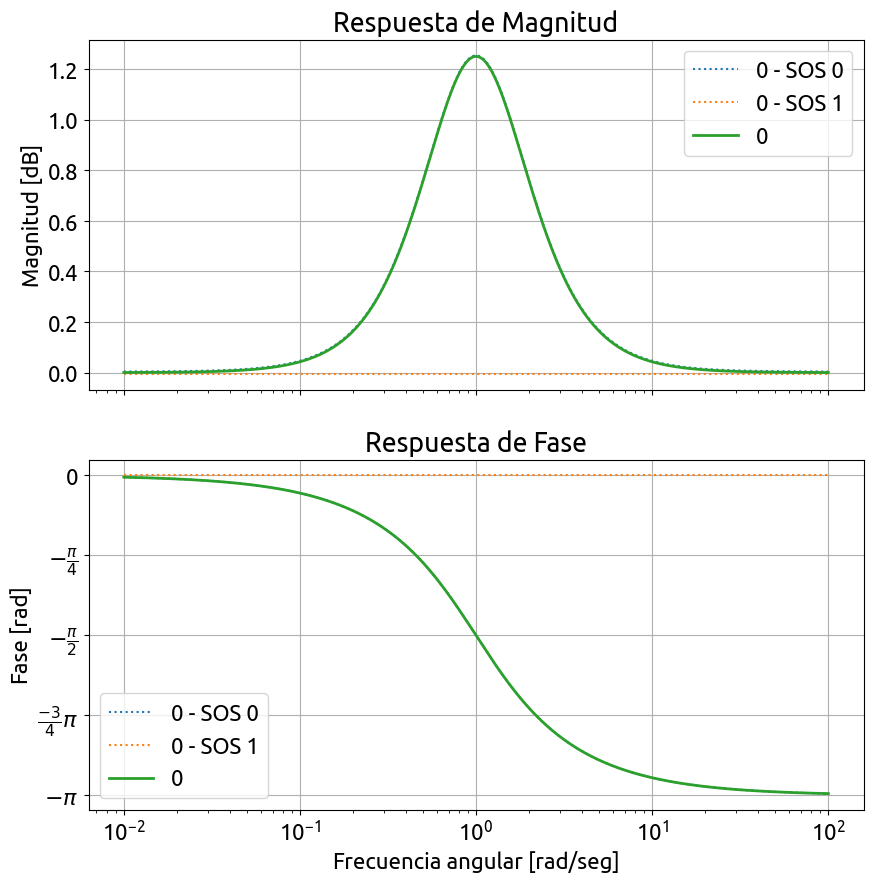

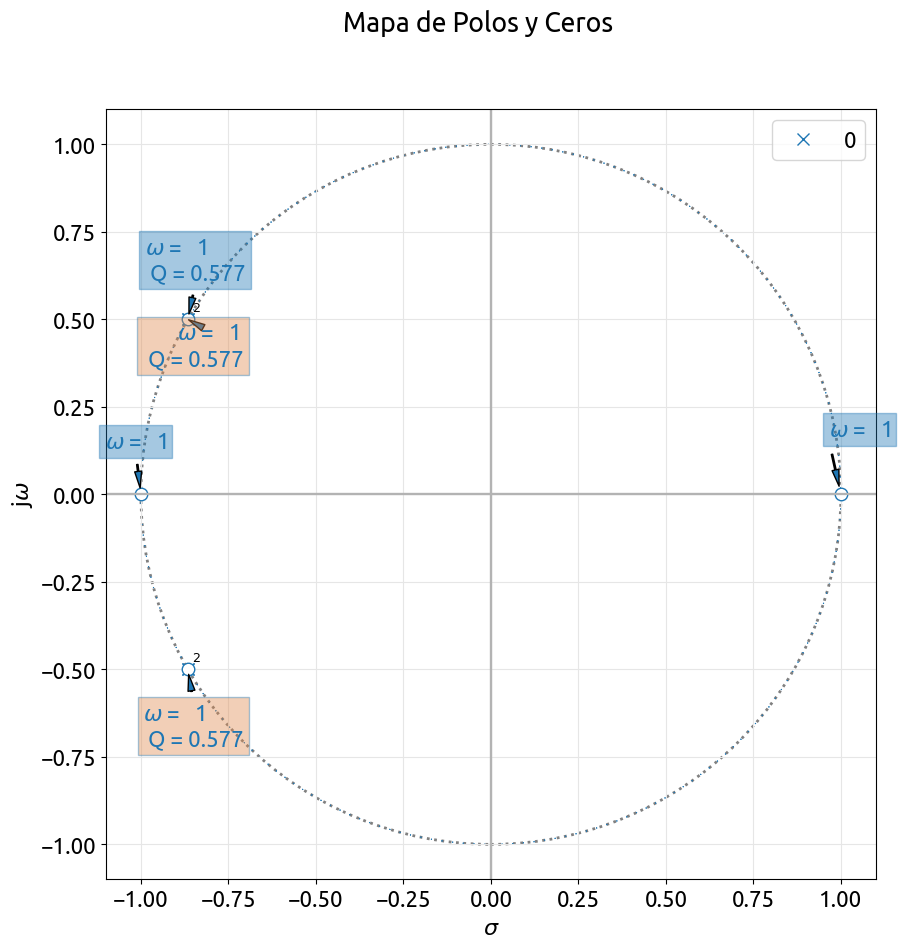

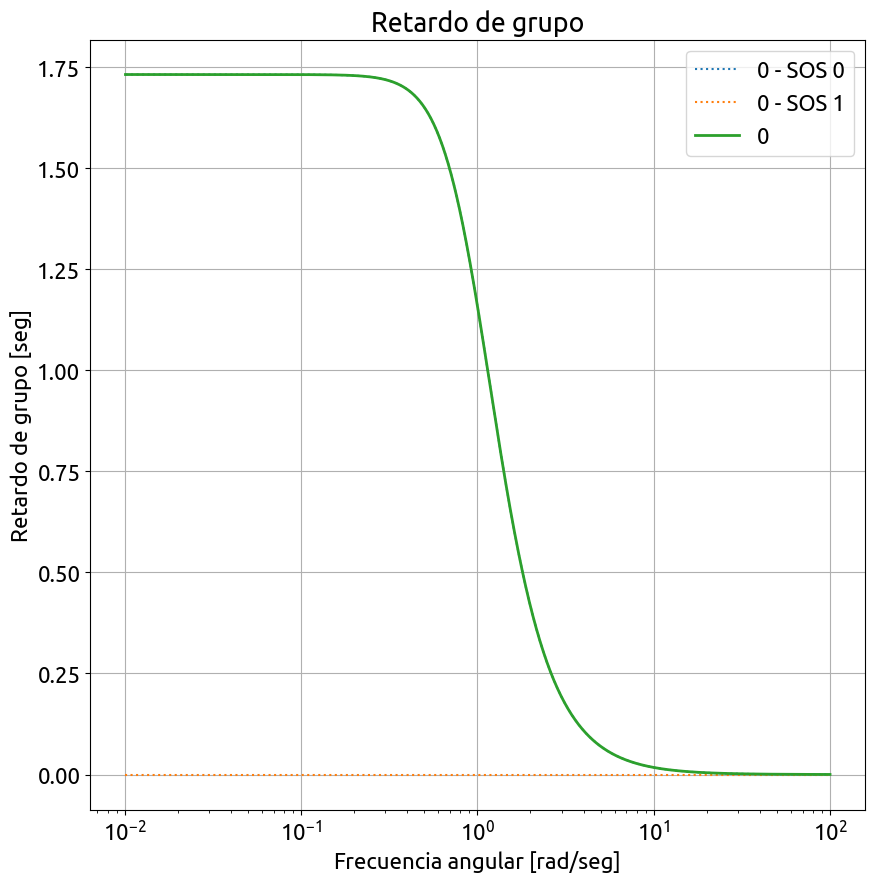

In [6]:
print_subtitle('Bessel crossover de orden {:d}'.format(nn))

# Sumamos ambos sistemas
tfXover = tfadd(tf_lp, tf_hp)
sos_xover = tf2sos_analog(tfXover.num, tfXover.den )

_,_,_,_, = analyze_sys(sos_xover)
# _,_,_,_, = analyze_sys([tf_lp, tf_hp, tfXover])
# analyze_sys(sig.TransferFunction(num, den)) 